In [2]:
pip install seaborn

     |████████████████████████████████| 215 kB 5.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = sns.load_dataset('mpg')

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [87]:
target = data['mpg']


In [88]:
features = data[['horsepower','weight','displacement']]

In [89]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [90]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [91]:
data.dropna(axis=0,inplace=True)

In [93]:
features.isna().sum()

horsepower      0
weight          0
displacement    0
dtype: int64

In [72]:
features.dropna(axis=0,inplace=True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
target.isna().sum()

0

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3)

In [97]:
features.shape

(392, 3)

In [98]:
x_train.shape

(274, 3)

In [99]:
x_test.shape

(118, 3)

In [100]:
x_train.head()

,horsepower,weight,displacement
31,95.0,2228,113.0
9,190.0,3850,390.0
218,58.0,1825,79.0
348,62.0,2050,89.0
390,96.0,2665,144.0


In [101]:
x_test.head()

,horsepower,weight,displacement
11,160.0,3609,340.0
328,67.0,3250,146.0
351,65.0,2045,98.0
6,220.0,4354,454.0
147,75.0,2108,90.0


In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression()

In [104]:
model.fit(x_train,y_train)

LinearRegression()

In [107]:
model.coef_

array([-0.04658462, -0.00570752, -0.00308987])

In [108]:
model.intercept_

46.049356581381794

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [110]:
y_prec = model.predict(x_test)

In [113]:
y_prec[:10]

array([16.94683529, 23.92763836, 31.04667843,  9.54741322, 30.24597773,
       22.81305621, 32.35574437, 11.63364114, 24.69490644, 22.29926388])

In [115]:
y_test.to_numpy()[:10]

array([14. , 30. , 34.4, 14. , 24. , 19. , 29.8, 14. , 27.9, 19. ])

In [117]:
mse = mean_squared_error(y_test, y_prec)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")

MSE: 19.26
RMSE: 4.39


In [118]:
acc = r2_score(y_test,y_prec)
print(f"accuracy: {acc*100:.2f}")

accuracy: 65.70


In [119]:
features[:3]

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0


In [120]:
target[:3]

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

In [122]:
model.predict(features[:3])-np.sqrt(mse)

array([14.65707334, 11.81502665, 14.07950349])

In [123]:
model.predict(features[:3])

array([19.04562881, 16.20358212, 18.46805896])

In [124]:
model.predict(features[:3])+np.sqrt(mse)

array([23.43418429, 20.5921376 , 22.85661444])

horsepower Corr Coeff: -0.78 


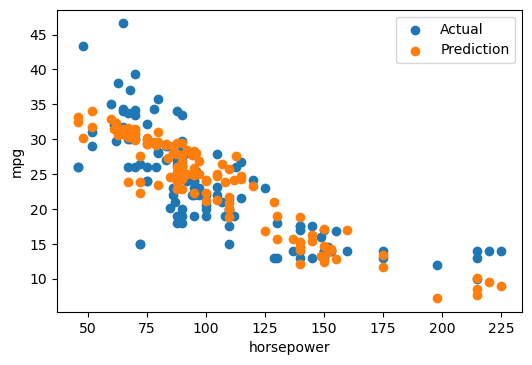

    weight Corr Coeff: -0.83 


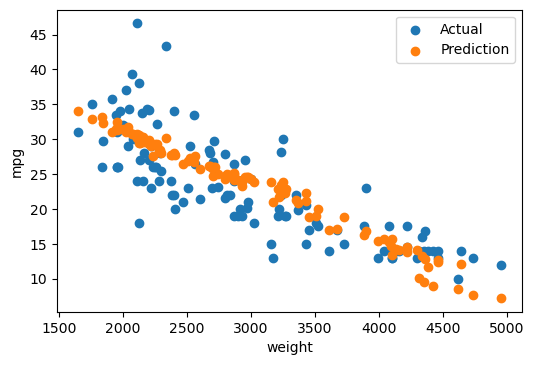

displacement Corr Coeff: -0.81 


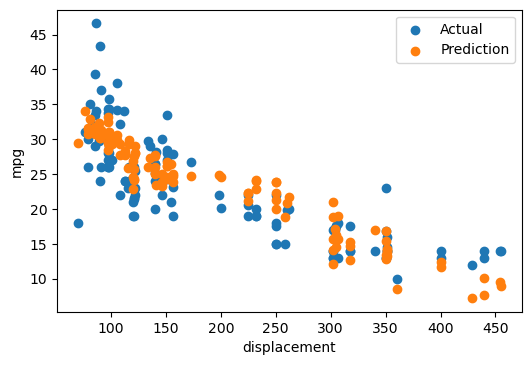

In [132]:
for col in features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=100)
    plt.scatter(x_test[col], y_test, label='Actual')
    plt.scatter(x_test[col], y_prec, label='Prediction')
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.legend()
    plt.show()

In [184]:
new_data = pd.DataFrame(features,target)
new_data

,horsepower,weight,displacement
mpg,,,
18.0,88.0,2130.0,97.0
15.0,95.0,2833.0,198.0
18.0,88.0,2130.0,97.0
16.0,97.0,2774.0,199.0
17.0,85.0,2587.0,200.0
...,...,...,...
27.0,210.0,4382.0,318.0
44.0,175.0,5140.0,400.0
32.0,NaN,NaN,NaN


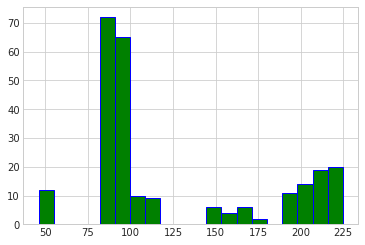

In [189]:
plt.hist(new_data['horsepower'],bins=20,ec='b',color='g')
plt.show()

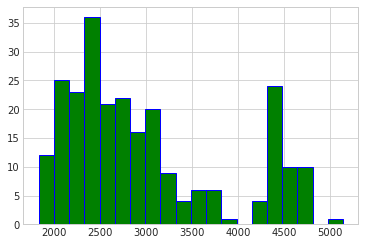

In [193]:
plt.hist(new_data['weight'],bins=20,ec='b',color='g')
plt.show()

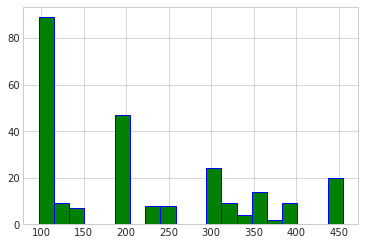

In [192]:
plt.hist(new_data['displacement'],bins=20,ec='b',color='g')
plt.show()

In [167]:
new_data = pd.DataFrame(features,target)
new_data

,horsepower,weight,displacement
mpg,,,
18.0,88.0,2130.0,97.0
15.0,95.0,2833.0,198.0
18.0,88.0,2130.0,97.0
16.0,97.0,2774.0,199.0
17.0,85.0,2587.0,200.0
...,...,...,...
27.0,210.0,4382.0,318.0
44.0,175.0,5140.0,400.0
32.0,NaN,NaN,NaN


In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scale_model = StandardScaler()

In [196]:
scaled_features = scale_model.fit_transform(new_data)

In [197]:
scaled_features = pd.DataFrame(scaled_features, columns=new_data.columns)

In [198]:
scaled_features[:5]

,horsepower,weight,displacement
0,-0.699623,-0.990014,-1.043014
1,-0.570555,-0.177891,-0.174610
2,-0.699623,-0.990014,-1.043014
3,-0.533678,-0.246049,-0.166011
4,-0.754938,-0.462076,-0.157413


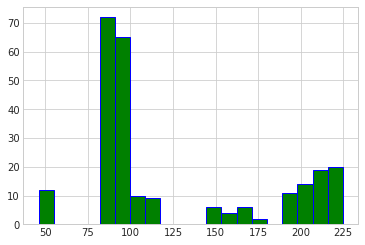

In [200]:
plt.hist(new_data['horsepower'],bins=20,ec='b',color='g')
plt.show()

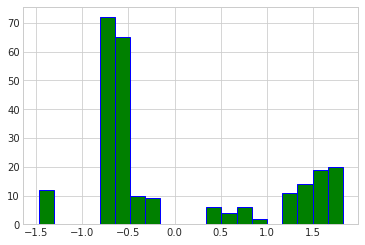

In [203]:
plt.hist(scaled_features['horsepower'],bins=20,ec='b',color='g')
plt.show()

In [204]:
y_train.head()

31     25.0
9      15.0
218    36.0
348    37.7
390    32.0
Name: mpg, dtype: float64

In [205]:
model = LinearRegression()

In [206]:
model.fit(x_train,y_train)

LinearRegression()

In [207]:
model.coef_

array([-0.04658462, -0.00570752, -0.00308987])

In [208]:
model.intercept_

46.049356581381794

In [209]:
prec = model.predict(x_test)

In [210]:
prec[:5]

array([16.94683529, 23.92763836, 31.04667843,  9.54741322, 30.24597773])

In [213]:
y_test[:5]

11     14.0
328    30.0
351    34.4
6      14.0
147    24.0
Name: mpg, dtype: float64

In [214]:
new_model = LinearRegression()

In [215]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_features, target)

In [220]:
model

LinearRegression()

In [221]:
type(model)

sklearn.linear_model._base.LinearRegression

In [226]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [227]:
import pickle

In [233]:
fp =open("mpg.pkl", 'wb')

In [234]:
pickle.dump(model,fp)

In [235]:
fp.close()

In [236]:
pwd

'/home/jovyan/binder'